<a href="https://colab.research.google.com/github/bfatmab/Sale_Forcasting_With_AI/blob/main/Sale_Forcasting_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import os

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,LSTM
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
# Adım 1: Veri Setini Yükleme
data = pd.read_csv('amazon.csv')

In [ ]:
# İlk 10 veriyi getirir
data.head(10)


In [ ]:
# Satır ve sütun sayısnı verir
data.shape

In [ ]:
sale_channel='Sales Channel'
ship_service_level='ship-service-level'
courier_status='Courier Status'
un='Unnamed: 22'

columns=['index','Status','Fulfilment',ship_service_level,'Style','SKU','Size','ASIN',courier_status,'Qty','currency','ship-city','ship-state','ship-state','ship-postal-code','ship-country','promotion-ids','B2B','fulfilled-by',un]
data=data.drop(columns,axis=1)
data.info()

Date kolonunun tipini değiştirdik

In [86]:
data['Date'] = pd.to_datetime(data['Date'])

bir veri çerçevesindeki tarih sütununu aylık döneme çevirerek ve bu aylara göre satışları toplamlayarak aylık satışları hesaplar.

In [ ]:
data['Date']= data['Date'].dt.to_period("M") 
monthly_sales=data.groupby('Date').sum().reset_index()

In [88]:
monthly_sales['Date']=monthly_sales['Date'].dt.to_timestamp()

In [ ]:
monthly_sales.head(10)

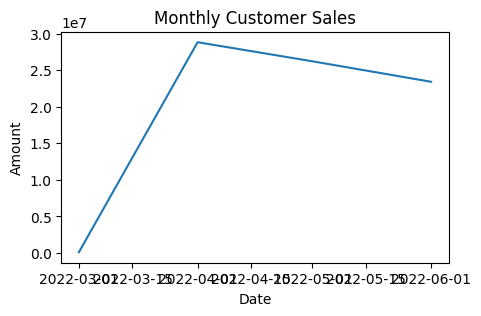

In [93]:
 plt.figure(figsize=(5,3))
 plt.plot(monthly_sales['Date'],monthly_sales['Amount'])
 plt.xlabel("Date")
 plt.ylabel("Amount")
 plt.title("Monthly Customer Sales")
 plt.show()